## Процесс решения задачи

Решение почти любой DS задачи в продуктовой аналитике можно разбить на следующие этапы:
1) Проанализировать задачу, понять к какому виду и классу обучения она относится. Вместе с бизнесом выбрать метрику

2) EDA (exploratory data analysis) - процесс когда мы изучаем качество данных, признаки, их распределение и связь с целевой(целевыми переменными)

3) Предобработка данных (обработка пропусков, кодирование/создание новых признаков, очистка данных от выбросов и т.д.)

4) Обучение и оптимизация моделей

5) Валидация результатов

## Данные и задача

Рассмотрим все этапы выше на примере задачи предсказания оттока пользователя. 

Ссылка на данные: https://www.kaggle.com/c/customer-churn-prediction-2020/data



In [4]:
!pip freeze requiements.txt

argon2-cffi==21.3.0
argon2-cffi-bindings==21.2.0
async-generator==1.10
attrs==22.2.0
backcall==0.2.0
bleach==4.1.0
cffi==1.15.1
colorama==0.4.5
cycler==0.11.0
dataclasses==0.8
decorator==5.1.1
defusedxml==0.7.1
entrypoints==0.4
importlib-metadata==4.8.3
ipykernel==5.5.6
ipython==7.16.3
ipython-genutils==0.2.0
jedi==0.17.2
Jinja2==3.0.3
joblib==1.1.1
jsonschema==3.2.0
jupyter-client==7.1.2
jupyter-core==4.9.2
jupyterlab-pygments==0.1.2
kiwisolver==1.3.1
MarkupSafe==2.0.1
matplotlib==3.3.4
mistune==0.8.4
nbclient==0.5.9
nbconvert==6.0.7
nbformat==5.1.3
nest-asyncio==1.6.0
notebook==6.4.10
numpy==1.19.5
packaging==21.3
pandas==1.1.5
pandocfilters==1.5.1
parso==0.7.1
pickleshare==0.7.5
Pillow==8.4.0
prometheus-client==0.17.1
prompt-toolkit==3.0.36
pycparser==2.21
Pygments==2.14.0
pyparsing==3.0.7
pyrsistent==0.18.0
python-dateutil==2.9.0.post0
pytz==2024.1
pywin32==305
pywinpty==0.5.7
pyzmq==25.1.2
scikit-learn==0.24.2
scipy==1.5.4
seaborn==0.11.2
Send2Trash==1.8.3
six==1.16.0
sklearn==0.0

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

In [6]:
train_data = pd.read_csv('train.csv')

train_data.sample(10)

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
75,DC,82,area_code_510,no,no,0,143.9,61,24.46,194.9,105,16.57,109.6,94,4.93,11.1,2,3.00,1,no
3894,RI,106,area_code_415,no,no,0,155.9,90,26.50,198.0,101,16.83,189.1,95,8.51,8.0,2,2.16,2,no
2826,AZ,192,area_code_415,no,yes,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,no
1584,NY,99,area_code_415,no,no,0,145.6,102,24.75,230.9,87,19.63,181.5,86,8.17,11.4,7,3.08,1,no
2767,OR,61,area_code_415,no,no,0,234.2,76,39.81,216.7,108,18.42,130.6,122,5.88,13.9,2,3.75,1,no
1882,TX,98,area_code_415,no,no,0,217.2,121,36.92,303.4,73,25.79,197.1,71,8.87,12.4,2,3.35,0,yes
2090,VT,142,area_code_415,no,no,0,232.5,74,39.53,181.8,142,15.45,203.1,86,9.14,10.4,6,2.81,4,no
4207,ID,110,area_code_415,no,no,0,170.1,87,28.92,216.6,98,18.41,225.0,88,10.13,10.8,3,2.92,2,no
1015,WV,48,area_code_408,no,no,0,275.2,67,46.78,180.2,108,15.32,159.0,110,7.15,7.9,2,2.13,1,no
3387,IL,158,area_code_415,no,yes,19,127.6,88,21.69,235.2,82,19.99,195.0,87,8.78,10.1,3,2.73,0,no


In [7]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4250 entries, 0 to 4249
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          4250 non-null   object 
 1   account_length                 4250 non-null   int64  
 2   area_code                      4250 non-null   object 
 3   international_plan             4250 non-null   object 
 4   voice_mail_plan                4250 non-null   object 
 5   number_vmail_messages          4250 non-null   int64  
 6   total_day_minutes              4250 non-null   float64
 7   total_day_calls                4250 non-null   int64  
 8   total_day_charge               4250 non-null   float64
 9   total_eve_minutes              4250 non-null   float64
 10  total_eve_calls                4250 non-null   int64  
 11  total_eve_charge               4250 non-null   float64
 12  total_night_minutes            4250 non-null   f

Выделим матрицу признаков и вектор с целевой переменной в тренировочной выборке

In [8]:
X = train_data.drop('churn', axis = 1)
y = train_data['churn']

## Выделим численные признаки от остальных

In [9]:
num_cols = []
str_cols = []

cols_and_type = X.dtypes.to_dict()

for col in cols_and_type:
    if cols_and_type[col] in ('int64', 'float64'):
        num_cols.append(col)
    else: 
        str_cols.append(col)
        
print(num_cols)

['account_length', 'number_vmail_messages', 'total_day_minutes', 'total_day_calls', 'total_day_charge', 'total_eve_minutes', 'total_eve_calls', 'total_eve_charge', 'total_night_minutes', 'total_night_calls', 'total_night_charge', 'total_intl_minutes', 'total_intl_calls', 'total_intl_charge', 'number_customer_service_calls']


In [10]:
cols_and_type

{'state': dtype('O'),
 'account_length': dtype('int64'),
 'area_code': dtype('O'),
 'international_plan': dtype('O'),
 'voice_mail_plan': dtype('O'),
 'number_vmail_messages': dtype('int64'),
 'total_day_minutes': dtype('float64'),
 'total_day_calls': dtype('int64'),
 'total_day_charge': dtype('float64'),
 'total_eve_minutes': dtype('float64'),
 'total_eve_calls': dtype('int64'),
 'total_eve_charge': dtype('float64'),
 'total_night_minutes': dtype('float64'),
 'total_night_calls': dtype('int64'),
 'total_night_charge': dtype('float64'),
 'total_intl_minutes': dtype('float64'),
 'total_intl_calls': dtype('int64'),
 'total_intl_charge': dtype('float64'),
 'number_customer_service_calls': dtype('int64')}

In [11]:
train_data[num_cols].describe()

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
count,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000
mean,100.236235,7.631765,180.259600,99.907294,30.644682,200.173906,100.176471,17.015012,200.527882,99.839529,9.023892,10.256071,4.426353,2.769654,1.559059
std,39.698401,13.439882,54.012373,19.850817,9.182096,50.249518,19.908591,4.271212,50.353548,20.093220,2.265922,2.760102,2.463069,0.745204,1.311434
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,73.000000,0.000000,143.325000,87.000000,24.365000,165.925000,87.000000,14.102500,167.225000,86.000000,7.522500,8.500000,3.000000,2.300000,1.000000
50%,100.000000,0.000000,180.450000,100.000000,30.680000,200.700000,100.000000,17.060000,200.450000,100.000000,9.020000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,16.000000,216.200000,113.000000,36.750000,233.775000,114.000000,19.867500,234.700000,113.000000,10.560000,12.000000,6.000000,3.240000,2.000000
max,243.000000,52.000000,351.500000,165.000000,59.760000,359.300000,170.000000,30.540000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


## Построим графики, посмотрим на распределение признаков

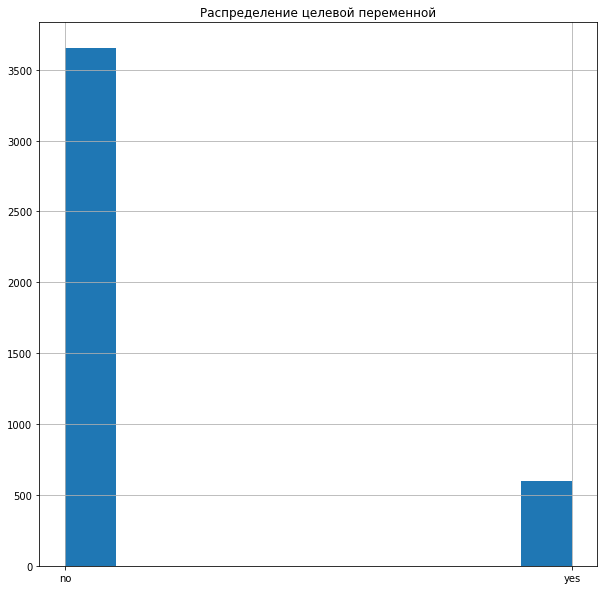

In [12]:
plt.figure(figsize = (10, 10))
plt.title('Распределение целевой переменной')
train_data['churn'].hist()

plt.show()

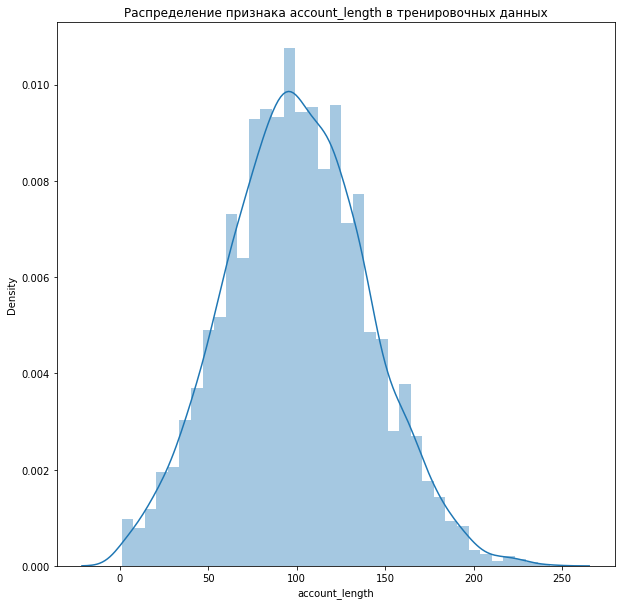

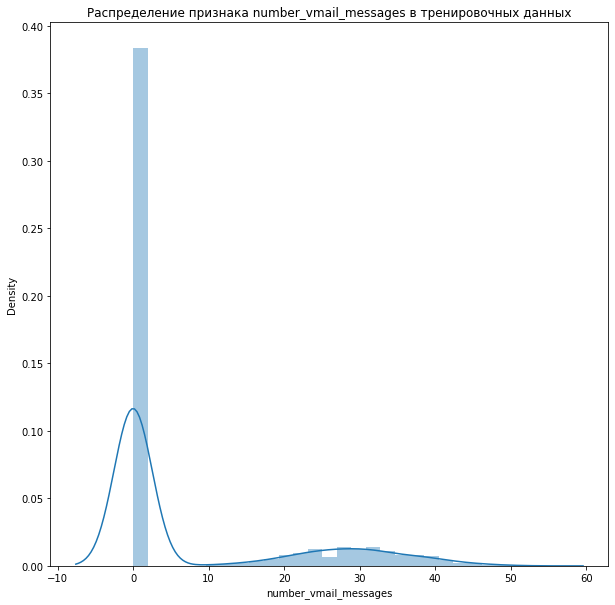

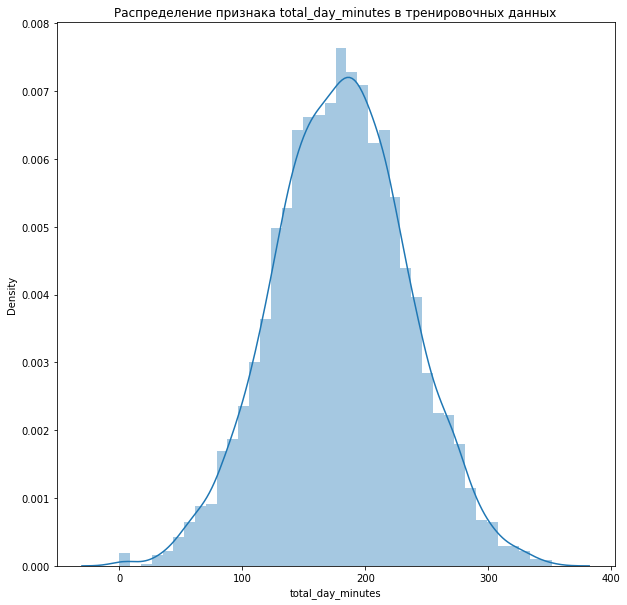

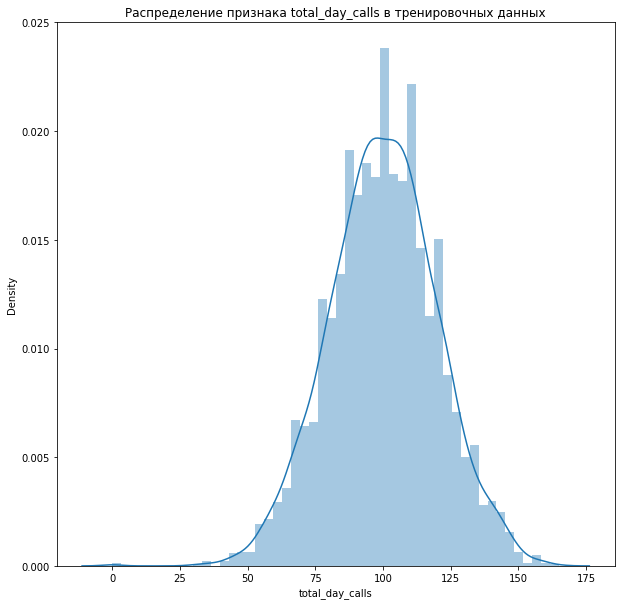

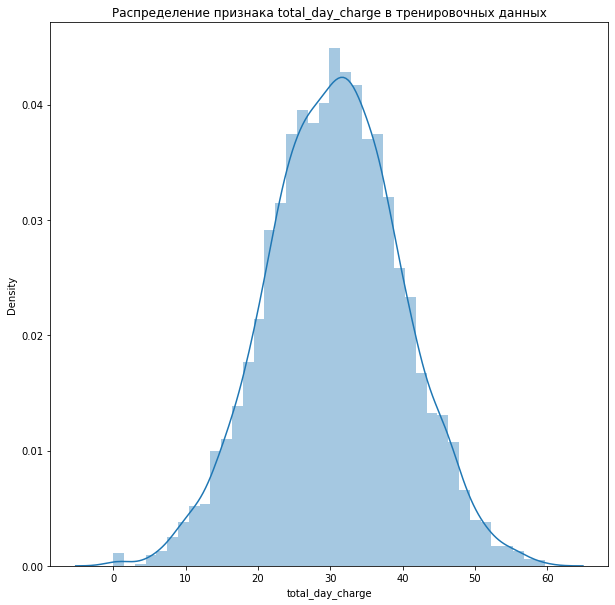

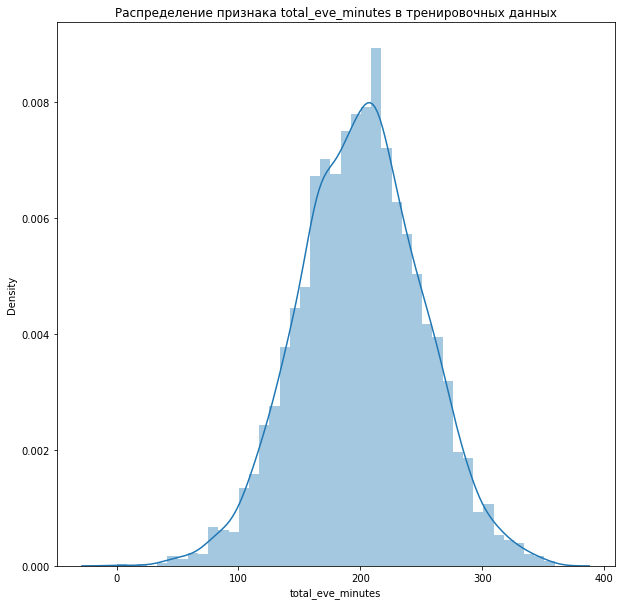

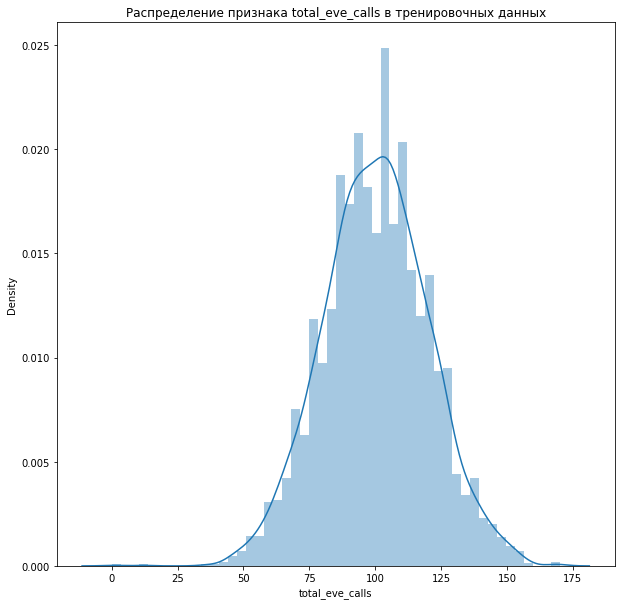

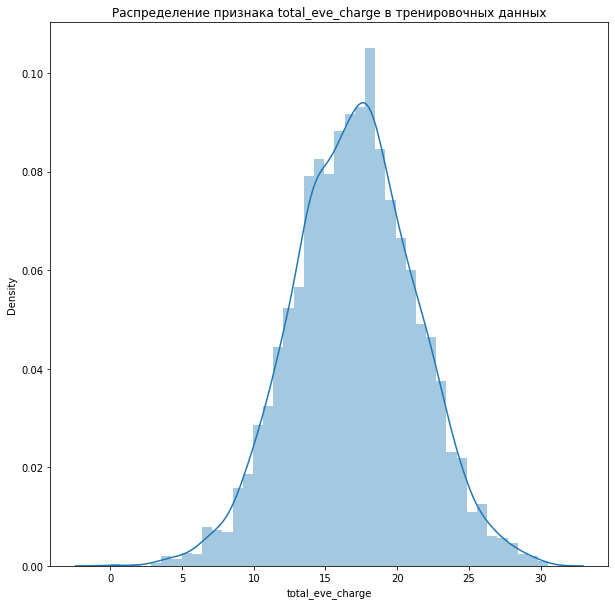

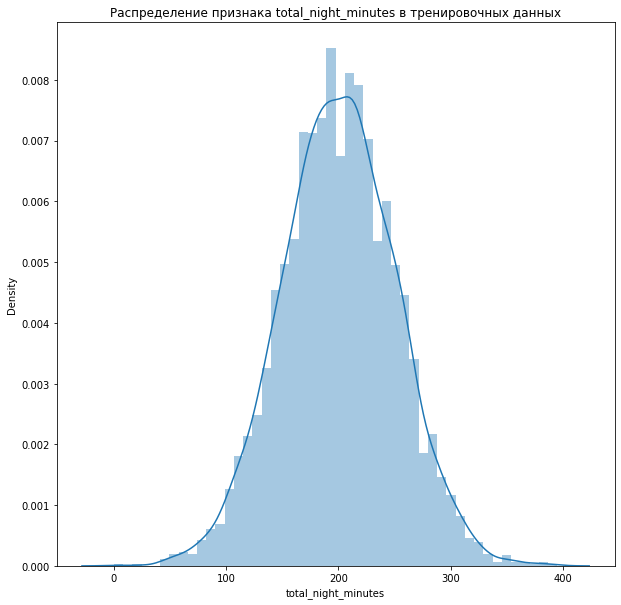

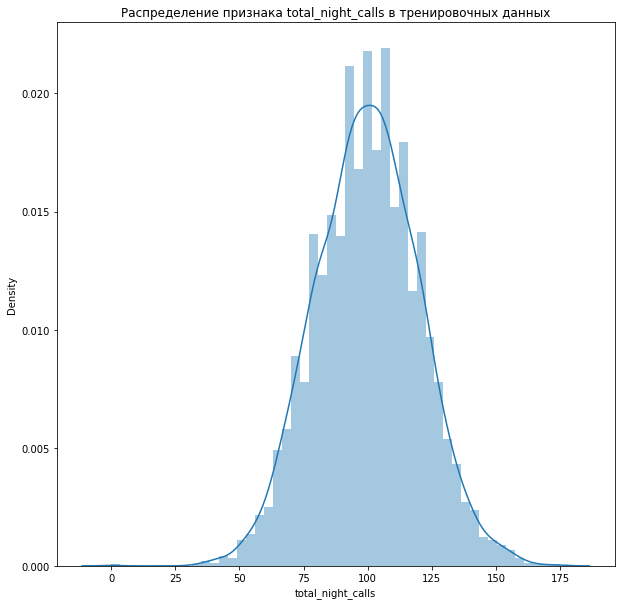

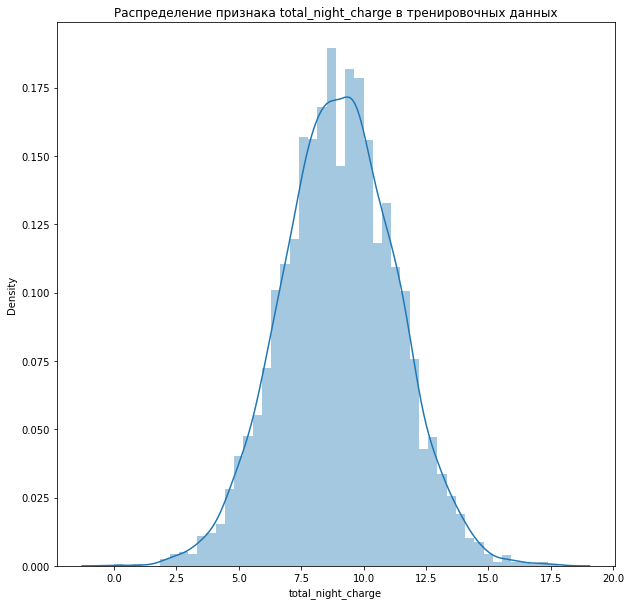

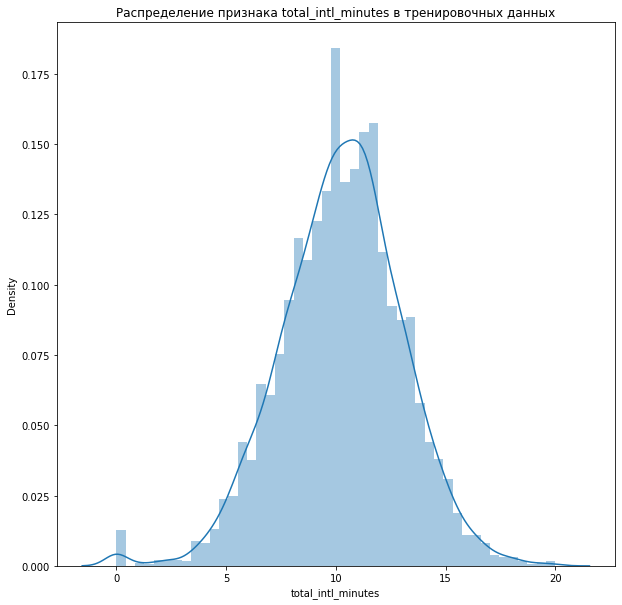

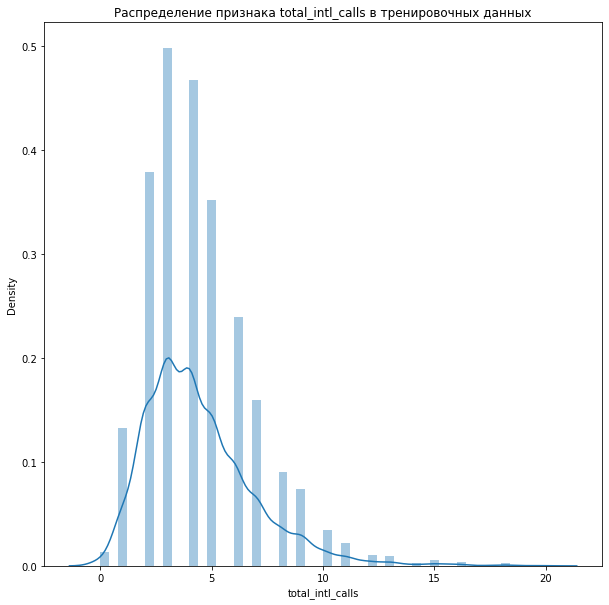

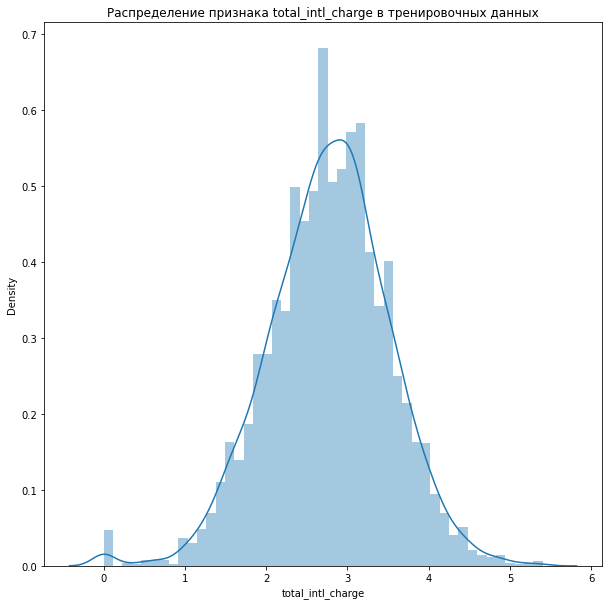

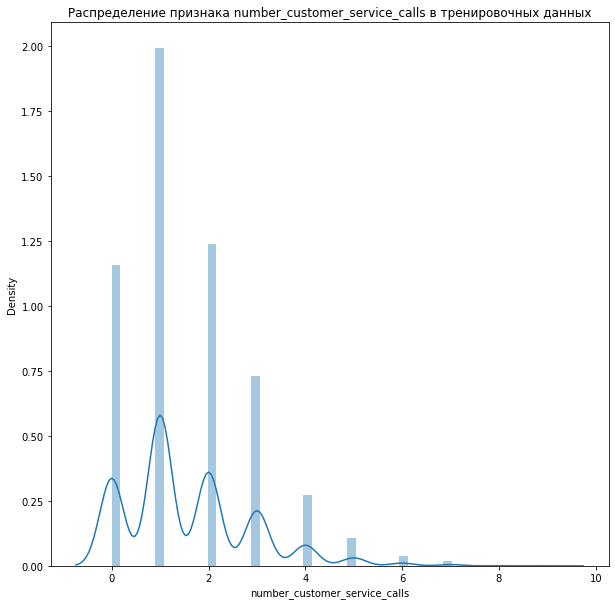

In [13]:
for col in num_cols:
    plt.figure(figsize = (10, 10))
    plt.title(f'Распределение признака {col} в тренировочных данных')
    sns.distplot(train_data[col])

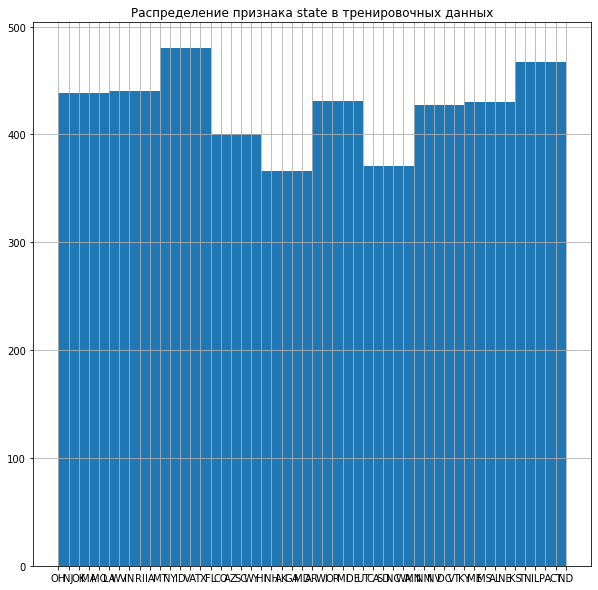

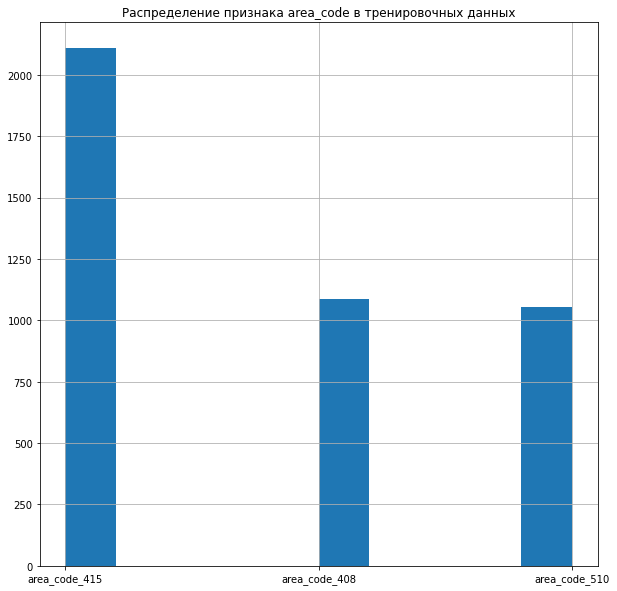

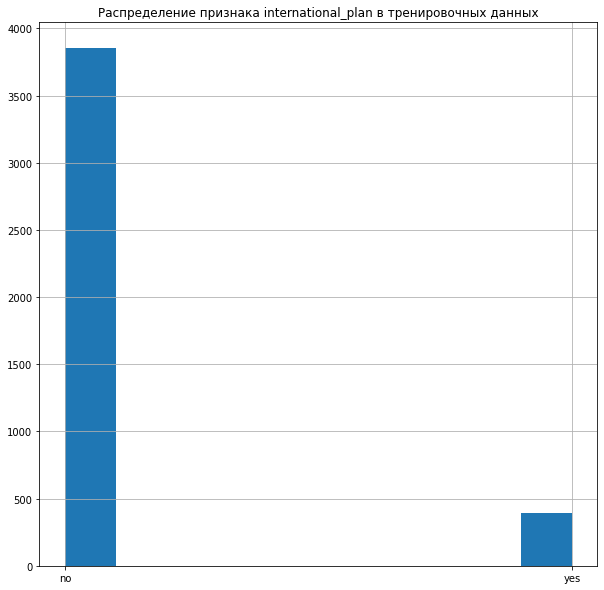

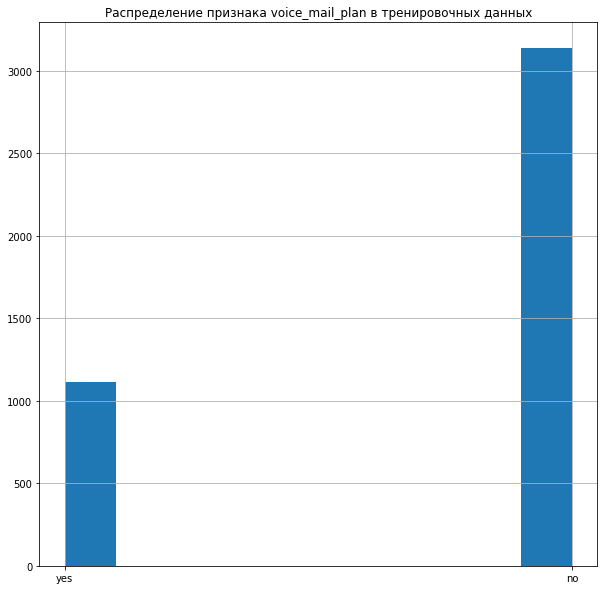

In [14]:
for col in str_cols:
    plt.figure(figsize = (10, 10))
    plt.title(f'Распределение признака {col} в тренировочных данных')
    train_data[col].hist()

## Сравнение ушедших с оставшимися

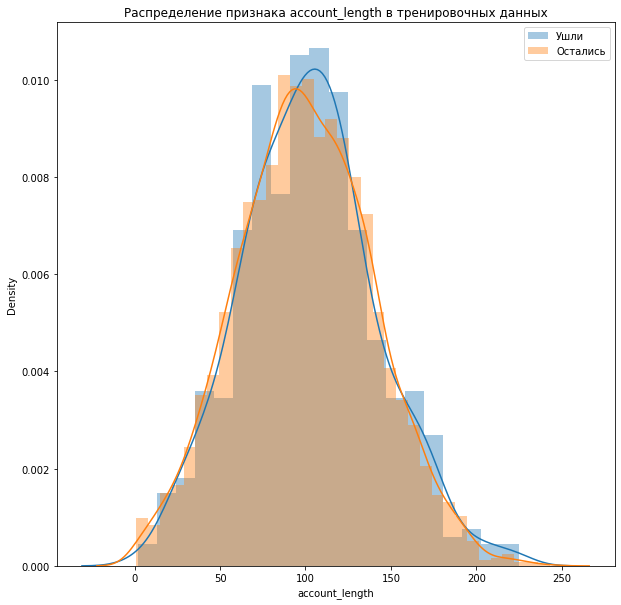

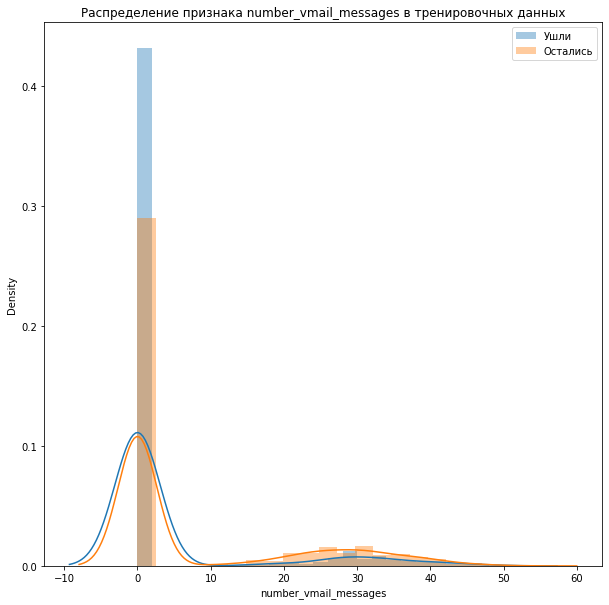

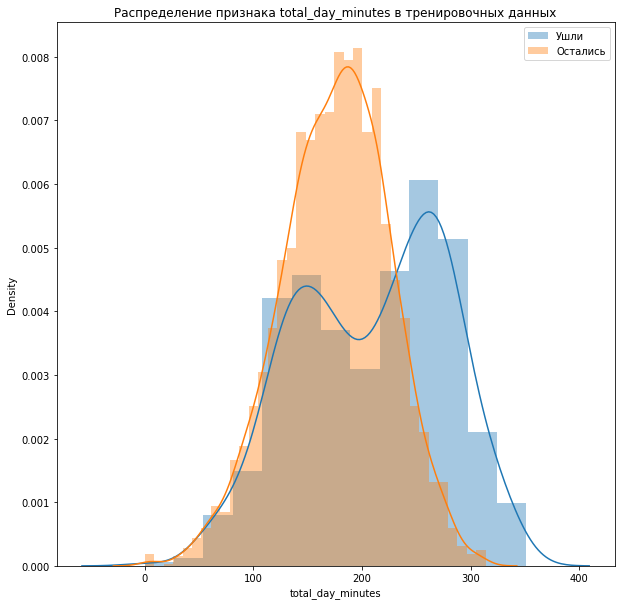

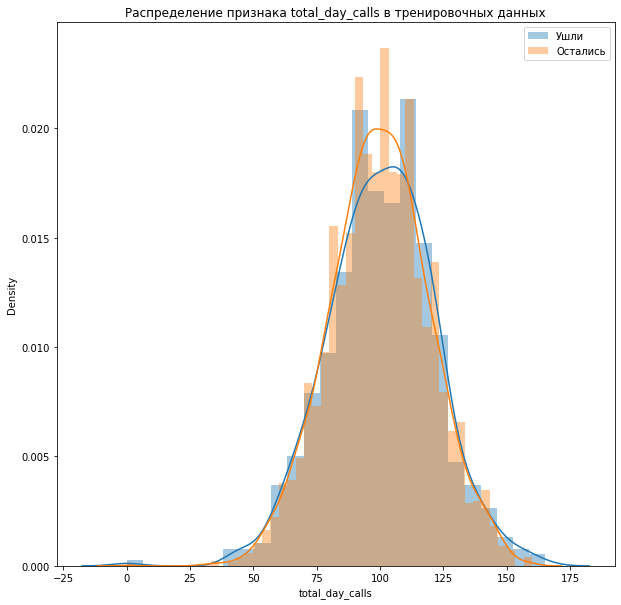

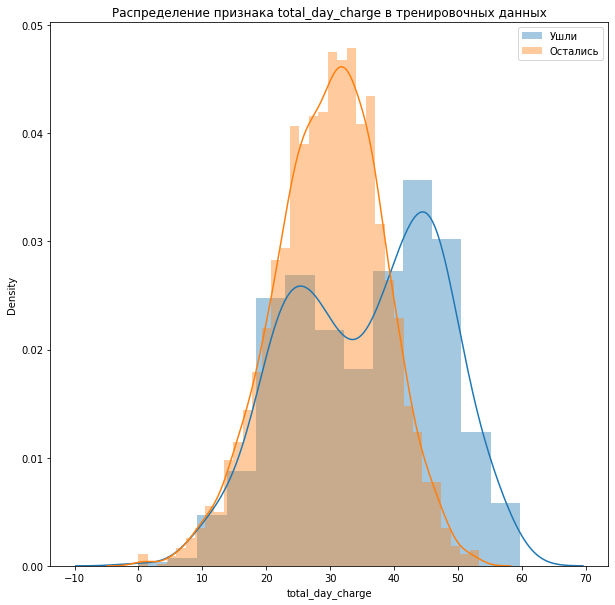

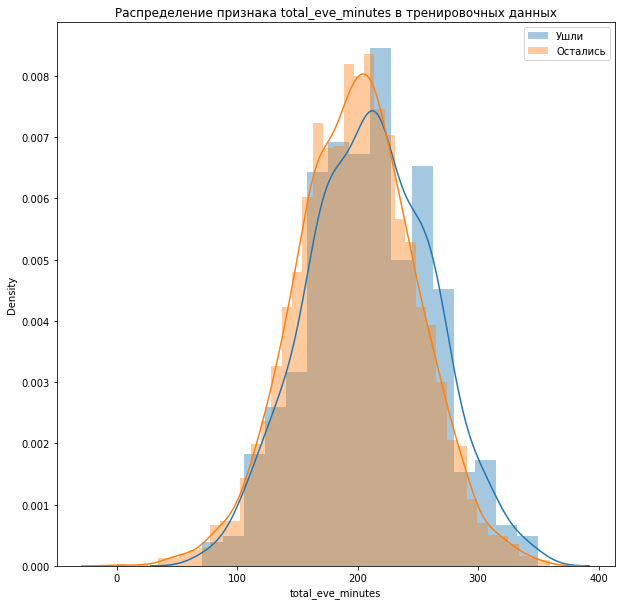

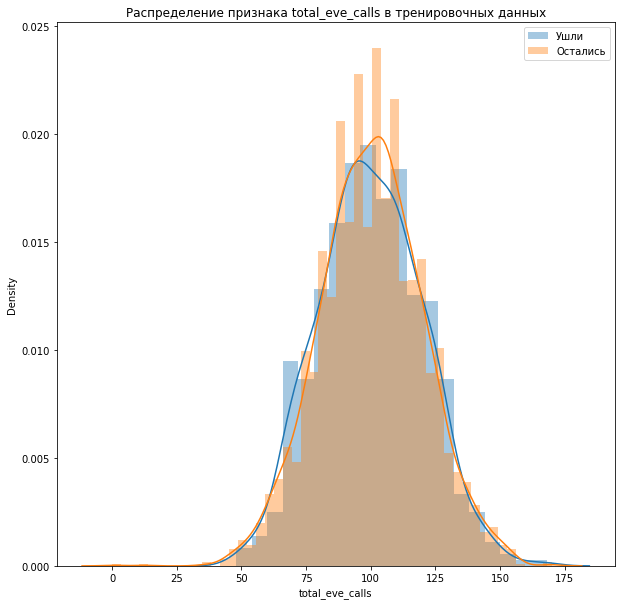

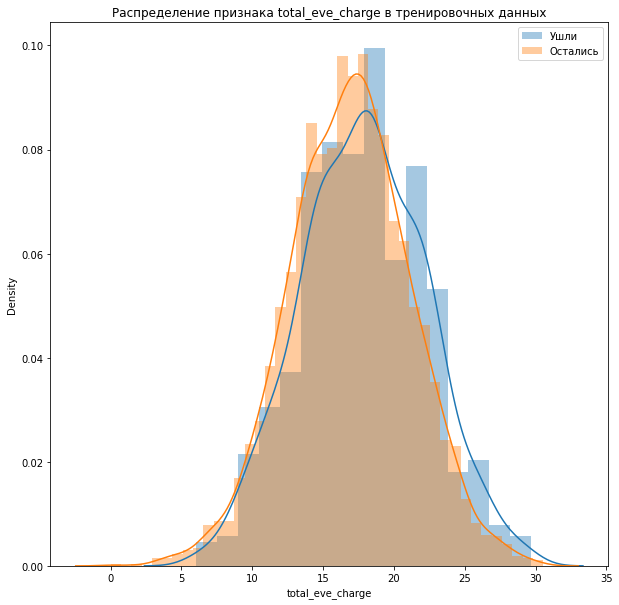

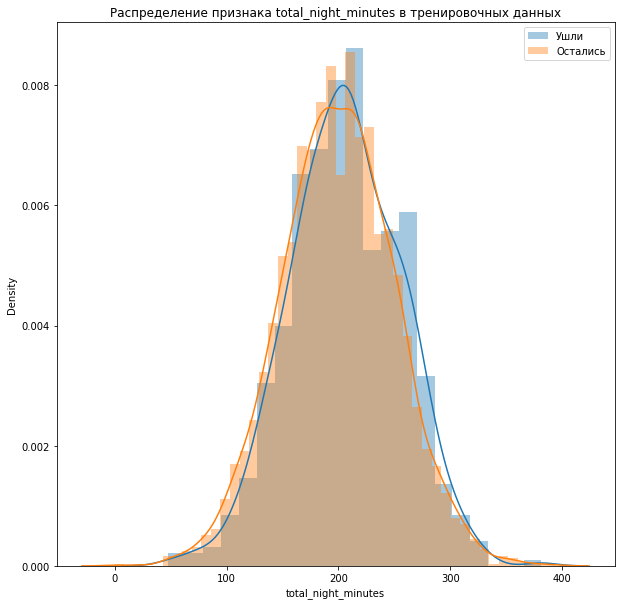

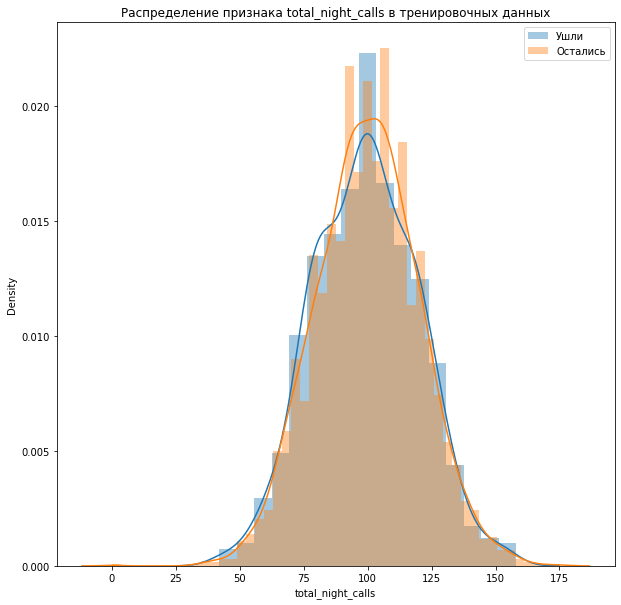

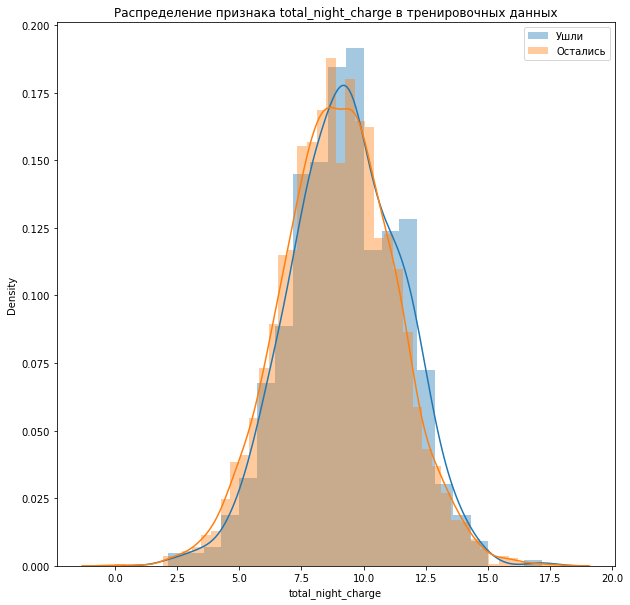

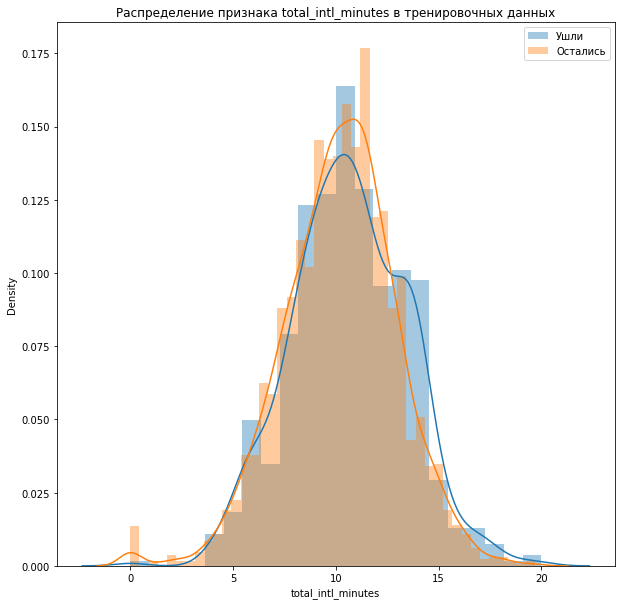

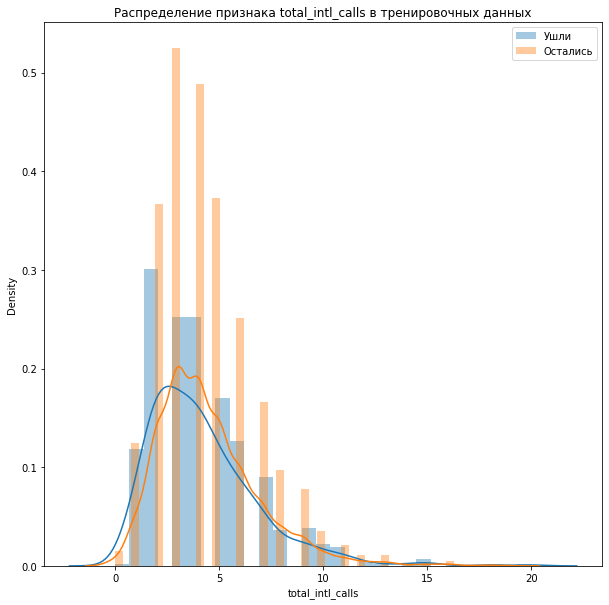

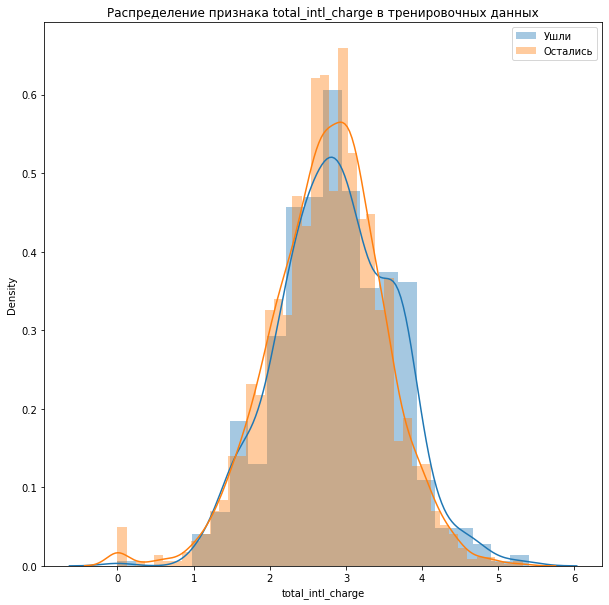

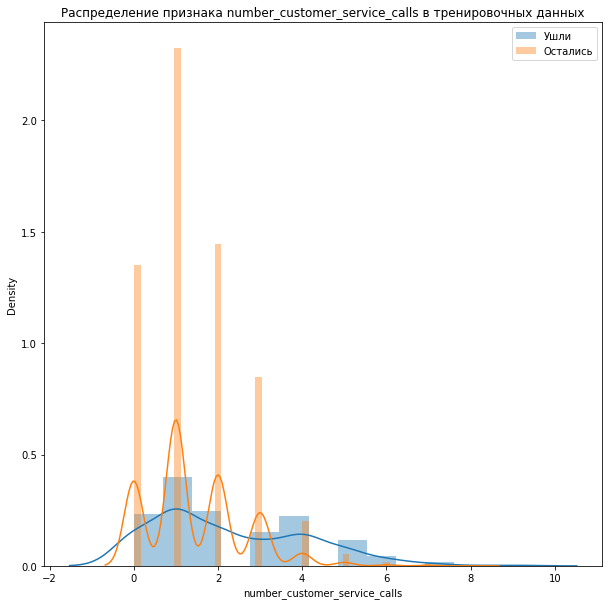

In [15]:
churn = train_data[train_data['churn'] == 'yes']
not_churn = train_data[train_data['churn'] == 'no']


for col in num_cols:
    plt.figure(figsize = (10, 10))
    plt.title(f'Распределение признака {col} в тренировочных данных')
    sns.distplot(churn[col], label = 'Ушли')
    sns.distplot(not_churn[col], label = 'Остались')   
    plt.legend()

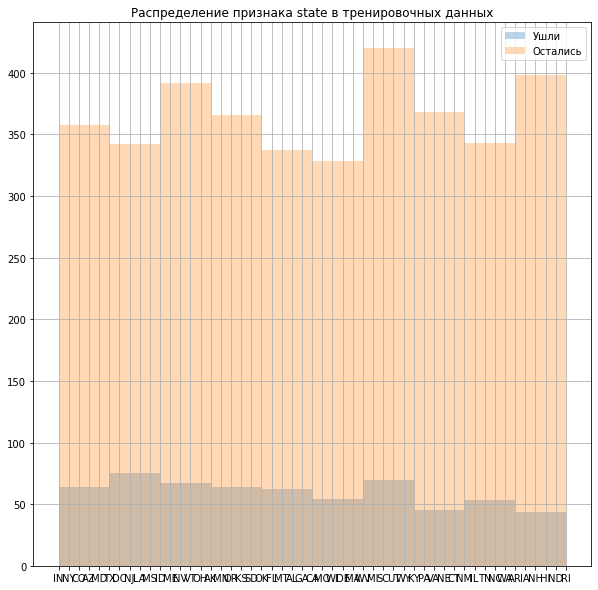

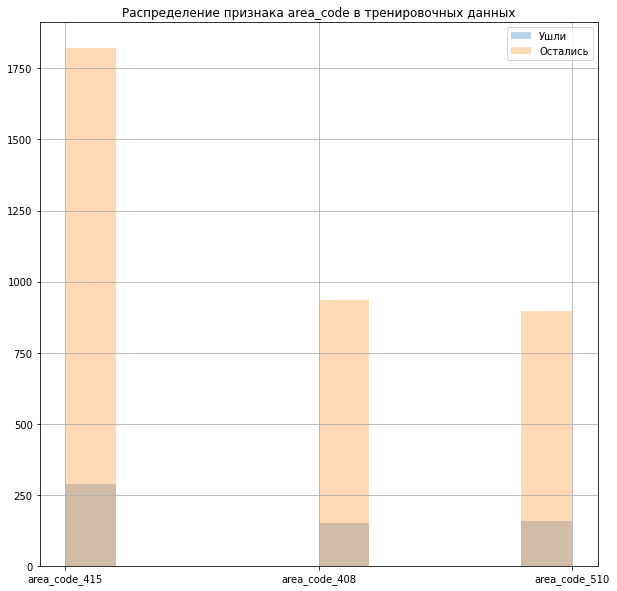

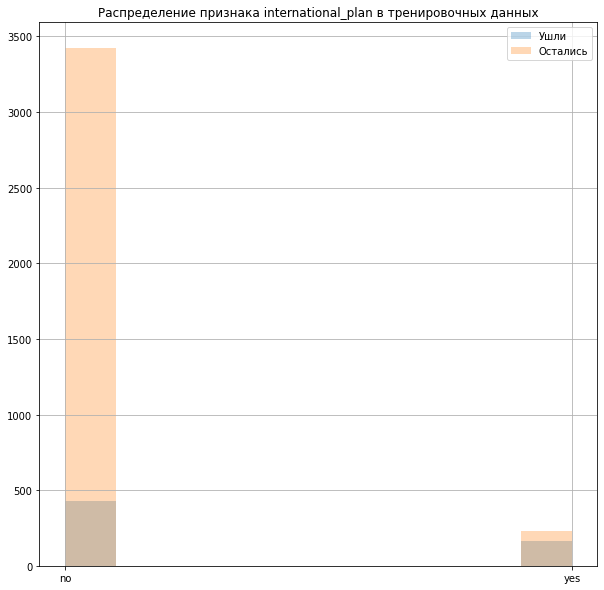

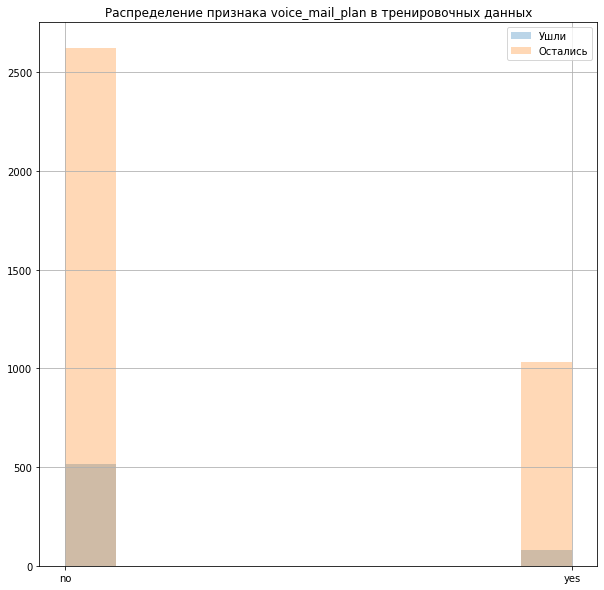

In [16]:
for col in str_cols:
    plt.figure(figsize = (10, 10))
    plt.title(f'Распределение признака {col} в тренировочных данных')
    churn[col].hist(label = 'Ушли', alpha=0.3)
    not_churn[col].hist(label = 'Остались', alpha = 0.3)   
    plt.legend()

## Предобработка признаков

**Важно** Любое изменение признаков нужно делать и на тренировочной и на тестовой выборке

In [21]:
test_data = pd.read_csv('test.csv')
print(test_data.shape)

(750, 20)


In [22]:
from sklearn.preprocessing import LabelEncoder

df = pd.DataFrame({"class" : ['business', 'economy', 'economy', 'economy_plus', 'None']})
df

,class
0,business
1,economy
2,economy
3,economy_plus
4,None


In [23]:
le = LabelEncoder()

le.fit_transform(df)

array([1, 2, 2, 3, 0])

In [24]:
from sklearn.preprocessing import LabelEncoder


le = LabelEncoder()
for col in str_cols:
    X[col] = le.fit_transform(X[col])
    test_data[col] = le.fit_transform(test_data[col])
    

X.sample(10)

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
592,42,69,2,0,0,0,195.3,70,33.20,216.7,108,18.42,259.9,119,11.70,12.5,4,3.38,3
3649,43,150,0,0,1,24,212.4,157,36.11,168.7,91,14.34,199.4,112,8.97,9.7,1,2.62,2
2697,49,109,1,0,0,0,180.0,100,30.60,229.0,103,19.47,139.4,105,6.27,7.8,8,2.11,3
366,2,135,2,0,1,27,273.4,141,46.48,154.0,99,13.09,245.8,112,11.06,12.3,6,3.32,1
1078,16,87,2,0,0,0,115.4,90,19.62,262.6,68,22.32,245.7,69,11.06,13.1,5,3.54,2
1428,38,141,2,0,0,0,215.6,113,36.65,200.6,81,17.05,153.8,107,6.92,12.4,6,3.35,1
1367,16,117,1,0,0,0,184.8,83,31.42,248.6,101,21.13,133.1,113,5.99,9.6,8,2.59,1
1449,11,104,0,0,0,0,170.6,97,29.00,162.1,111,13.78,210.7,131,9.48,6.1,1,1.65,1
967,16,167,1,0,0,0,131.6,120,22.37,211.3,96,17.96,168.3,97,7.57,11.1,4,3.00,4
2938,30,148,2,0,0,0,168.8,102,28.70,248.1,125,21.09,250.7,96,11.28,10.6,4,2.86,1


In [25]:
y = le.fit_transform(y)
y[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0])

In [26]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_sc = sc.fit_transform(X)


## Корреляция признаков

Корреля́ция (от лат. correlatio «соотношение»), или корреляцио́нная зави́симость — статистическая взаимосвязь двух или более случайных величин (либо величин, которые можно с некоторой допустимой степенью точности считать таковыми). При этом изменения значений одной или нескольких из этих величин сопутствуют систематическому изменению значений другой или других величин **(с) Википедия**


**Корреляция** - величина показывающая связь двух и более величин. Существуют различные виды корреляций, мы не будем останавливаться на этом, для желающих разобраться ссылки на материалы в конце урока

**Корреляционная матрица** - квадратная матрица, элементы которой представляют собой корреляцию величин
В библиотеке `pandas.DataFrame` есть атрибут `corr()`, который считает корреляционную матрицу

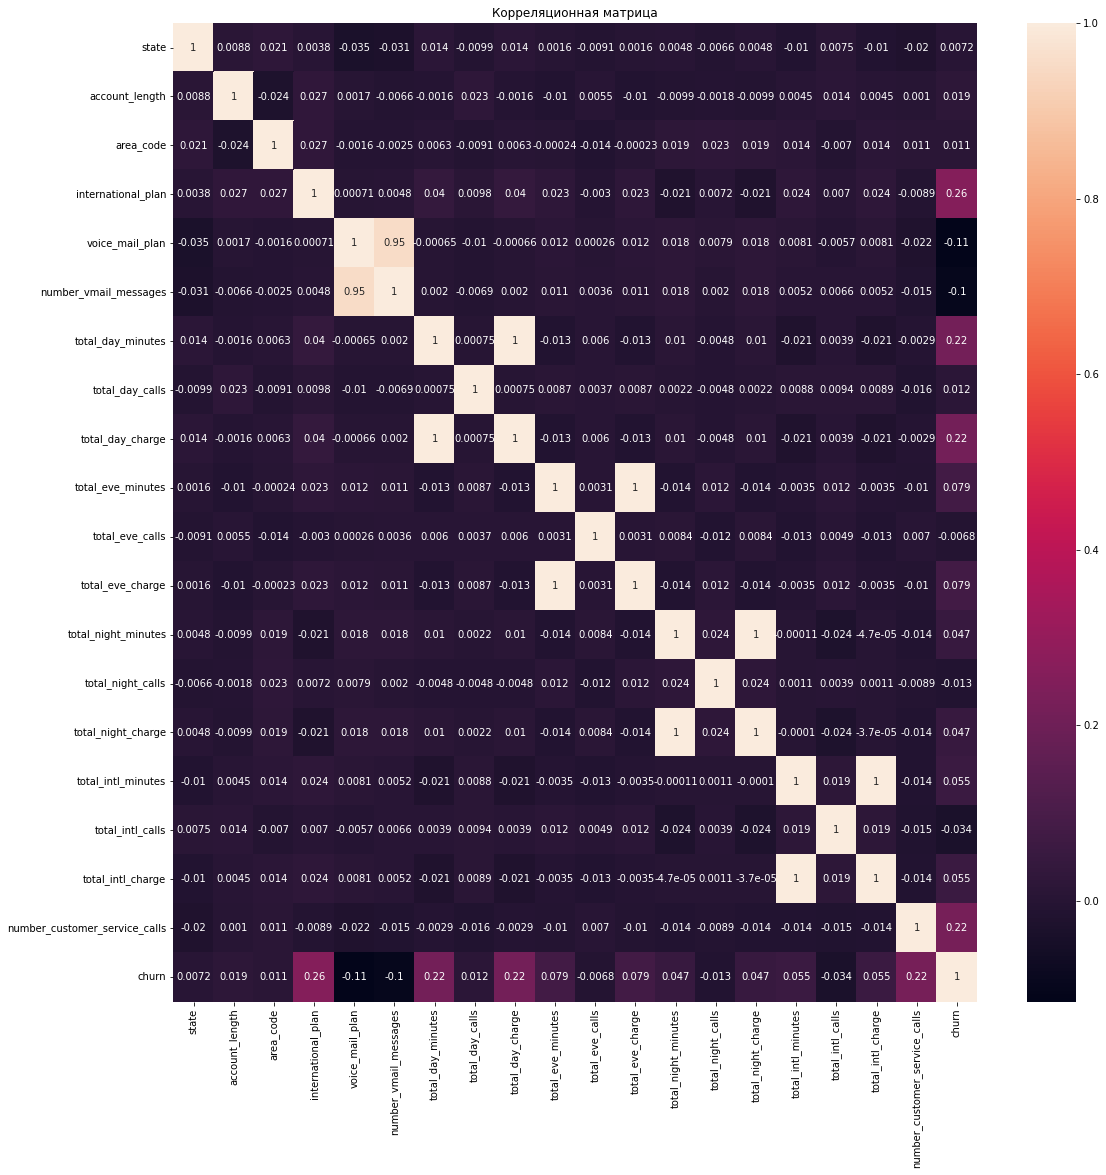

In [27]:
# Преобразуем матрицу признаков в DataFrame
train_data_trasformed = pd.DataFrame(X_sc, columns = X.columns)
train_data_trasformed['churn'] = y
# Создаем корреляционную матрицу
corr_m = train_data_trasformed.corr()



# Визуализируем матрицу при помощи sns.heatmap
plt.figure(figsize = (18, 18))
plt.title('Корреляционная матрица')
sns.heatmap(corr_m, annot = True)
plt.show()

In [28]:
corr_m

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
state,1.000000,0.008818,0.020713,0.003822,-0.034752,-0.030857,0.014263,-0.009890,0.014262,0.001603,-0.009116,0.001603,0.004827,-0.006597,0.004815,-0.010260,0.007469,-0.010284,-0.020421,0.007181
account_length,0.008818,1.000000,-0.023530,0.027050,0.001663,-0.006626,-0.001612,0.023002,-0.001613,-0.010326,0.005535,-0.010322,-0.009916,-0.001846,-0.009942,0.004539,0.013690,0.004494,0.001002,0.019378
area_code,0.020713,-0.023530,1.000000,0.027133,-0.001622,-0.002468,0.006344,-0.009064,0.006342,-0.000244,-0.014031,-0.000229,0.019034,0.022869,0.019031,0.013641,-0.007027,0.013518,0.011064,0.010696
international_plan,0.003822,0.027050,0.027133,1.000000,0.000714,0.004808,0.040059,0.009776,0.040061,0.023484,-0.003004,0.023479,-0.020694,0.007153,-0.020694,0.023815,0.006956,0.023799,-0.008881,0.259053
voice_mail_plan,-0.034752,0.001663,-0.001622,0.000714,1.000000,0.954014,-0.000653,-0.010004,-0.000658,0.011982,0.000263,0.011989,0.017884,0.007872,0.017875,0.008098,-0.005674,0.008129,-0.021504,-0.114643
number_vmail_messages,-0.030857,-0.006626,-0.002468,0.004808,0.954014,1.000000,0.002000,-0.006920,0.001994,0.010725,0.003593,0.010736,0.018308,0.001977,0.018300,0.005220,0.006585,0.005249,-0.015303,-0.100347
total_day_minutes,0.014263,-0.001612,0.006344,0.040059,-0.000653,0.002000,1.000000,0.000747,1.000000,-0.013248,0.005986,-0.013258,0.010049,-0.004812,0.010036,-0.021369,0.003859,-0.021291,-0.002925,0.215272
total_day_calls,-0.009890,0.023002,-0.009064,0.009776,-0.010004,-0.006920,0.000747,1.000000,0.000751,0.008661,0.003739,0.008663,0.002206,-0.004815,0.002200,0.008834,0.009377,0.008909,-0.015845,0.011640
total_day_charge,0.014262,-0.001613,0.006342,0.040061,-0.000658,0.001994,1.000000,0.000751,1.000000,-0.013247,0.005985,-0.013257,0.010053,-0.004816,0.010040,-0.021374,0.003853,-0.021296,-0.002932,0.215263
total_eve_minutes,0.001603,-0.010326,-0.000244,0.023484,0.011982,0.010725,-0.013248,0.008661,-0.013247,1.000000,0.003101,1.000000,-0.014018,0.011973,-0.014031,-0.003509,0.012239,-0.003460,-0.010063,0.078855


## Обучение различных моделей

Будем сравнивать между собой 3 модели: Логистическую регрессию, классификатор на решающем дереве, и случайный лес

In [29]:
# Логистическая регрессия
from sklearn.linear_model import LogisticRegression

# Кросс-валидация
from sklearn.model_selection import cross_validate

log_reg = LogisticRegression(C = 0.8, random_state = 42, max_iter = 500)

cv_log_reg = cross_validate(log_reg, X_sc, y, cv = 5, scoring = 'roc_auc')

print("Результаты Логистической регрессии:", sum(cv_log_reg['test_score']) / len(cv_log_reg['test_score']))

Результаты Логистической регрессии: 0.824241694732725


In [30]:
# Решающее дерево
from sklearn.tree import DecisionTreeClassifier


dec_tree = DecisionTreeClassifier(random_state = 42) # Можно найти более оптимальные гиперпараметры

cv_dec_tree = cross_validate(dec_tree, X_sc, y, cv = 5, scoring = 'roc_auc')

print("Результаты решающего дерева:", sum(cv_dec_tree['test_score']) / len(cv_dec_tree['test_score']))

Результаты решающего дерева: 0.8371520707677782


In [31]:
# Случайный лес
from sklearn.ensemble import RandomForestClassifier


ran_for = RandomForestClassifier(random_state = 42) # Можно найти более оптимальные гиперпараметры

cv_ran_for = cross_validate(ran_for, X_sc, y, cv = 5, scoring = 'roc_auc')

print("Результаты решающего дерева:", sum(cv_ran_for['test_score']) / len(cv_ran_for['test_score']))

Результаты решающего дерева: 0.9214617474990672


Как видно, лучший результат показал случайный лес

## Интерпретация модели и важность признаков

Для того чтобы понять что заставляет пользователей уходить и оставаться, нужно понять влияние признаков. При работе с логистической регрессией можно использовать атрибут `coef_`

**Важно** атрибут `coef_` работает только когда метод `fit()` был явно вызван

In [32]:
log_reg.fit(X, y)
print("Коэффициенты в линейной регрессии:", log_reg.coef_)

Коэффициенты в линейной регрессии: [[-2.97887164e-03 -8.69003630e-04 -6.84001552e-03  1.31303043e+00
  -1.01498826e+00  2.31196432e-03  1.26640409e-02 -6.65256635e-03
  -1.13689800e-02  2.46883414e-03 -9.70237141e-03  4.05067574e-03
   1.12545082e-03 -1.01584567e-02 -4.47300878e-03  2.28686907e-02
  -8.23386815e-02  3.67932585e-03  4.34799556e-01]]


При работе с одним решающем дереве интерпретировать результаты достаточно просто, для этого есть атрибут `feature_importances_` Он показывает долю важности признака на целевую переменную

**Важно** атрибут `feature_importances_` работает только когда метод `fit()` был явно вызван

In [33]:
dec_tree.fit(X, y)
print("Важность признаков решающего дерева", dec_tree.feature_importances_)

Важность признаков решающего дерева [0.01029229 0.01539475 0.00632471 0.06271318 0.00145955 0.07490983
 0.2421433  0.01972551 0.03539672 0.07148688 0.02155188 0.05592603
 0.03678969 0.01572565 0.03679544 0.08708072 0.07061281 0.03139983
 0.10427124]


Некоторые типы моделей (например экстримально случайный лес и все что основано на бустинге) интерпретировать стандартными способами практически невозможно. 

Для интерпретации таких моделей можно использовать библиотеку `shap`, которая работает на основе ядра и вектора Шэпли - важнейших понятий в коалиционной теории игр

In [34]:
# Раскомментируйте чтобы установить 
#!pip install shap

In [35]:
import shap
# Загружаем JS шаблоны для визуализации
shap.initjs()

# Обязателен явный вызов метода fit
ran_for.fit(X, y)

print("Обучили модель, переходим к визуализации")
# Интерпретируем предсказания модели при помощи SHAP
explainer = shap.TreeExplainer(ran_for)
shap_values = explainer.shap_values(X)

Обучили модель, переходим к визуализации


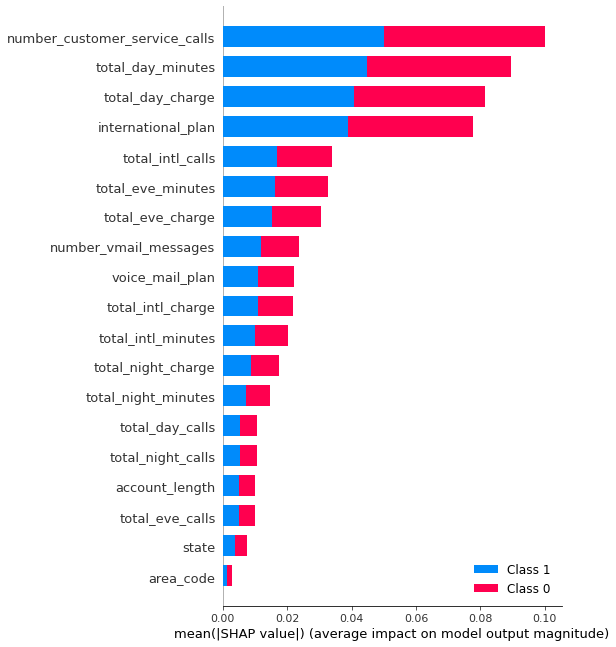

In [36]:
# Общий график
shap.summary_plot(shap_values, X, plot_type="bar")